In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("../datasets/Wastewater_Data_Full_UGS_Group5.csv", thousands=",").dropna()
dataset.head()

,Date,Zipcode,Viral Load,Positivity Rate,Unvaccinated Rate,Population,Educational attainment,Educational attainment in TX,Poverty,Poverty in Texas,Income (Median),Income(Median in TX),Health(lack of health insurance),Health(lack of Health insurance in TX)
0,07/06/2020-07/13/2023,77002,1.36,16,13,19844,33.30%,33.90%,17.90%,14%,"$78,292.00",72284,12.00%,16.60%
1,07/06/2020-07/13/2024,77003,1.12,6,18,11874,48.30%,33.90%,21.30%,14%,"$87,618",72284,14.80%,16.60%
2,07/06/2020-07/13/2025,77004,0.75,3,40,37005,58.60%,33.90%,27.30%,14%,"$68,141",72284,13.50%,16.60%
3,07/06/2020-07/13/2026,77005,0.50,29,13,28241,86.20%,33.90%,4.30%,14%,"$213,059",72284,2.70%,16.60%
5,07/06/2020-07/13/2028,77007,1.02,6,9,42908,80.30%,33.90%,5.80%,14%,"$140,536",72284,5.50%,16.60%


In [2]:
# COVID DATA
viral_load = dataset["Viral Load"]
positivity = dataset["Positivity Rate"]

viral_load.head()

0    1.36
1    1.12
2    0.75
3    0.50
5    1.02
Name: Viral Load, dtype: float64

In [35]:
def element_wise_mult(lista, listb):
    for i in range(len(lista)):
        listb[i] = lista[i] * listb[i]
    return listb

In [36]:
# DEMOGRAPHIC DATA
pop = pd.to_numeric(dataset["Population"]).values.reshape(-1, 1)
edu_pct = pd.to_numeric(dataset["Educational attainment "].map(lambda p : p[0:p.find("%")]))
med = pd.to_numeric(dataset["Income (Median)"].map(lambda i : i[1:len(i)].replace(",",""))).values.reshape(-1, 1)
health_pct = pd.to_numeric(dataset["Health(lack of health insurance)"].map(lambda p : p[0:p.find("%")]))
pov_pct = pd.to_numeric(dataset["Poverty"].map(lambda p : p[0:p.find("%")]))

print(len(pop))
print(len(med))

100
100


In [42]:
# Turn our percentages into decimals
pov = element_wise_mult(pop, np.multiply(1/100, pov_pct.values)).reshape(-1,1)
edu = element_wise_mult(pop, np.multiply(1/100, edu_pct.values)).reshape(-1,1)
health = element_wise_mult(pop, np.multiply(1/100, health_pct.values)).reshape(-1,1)

In [43]:
print(pov.shape)
pov

(100, 1)


array([[ 3552.076],
       [ 2529.162],
       [10102.365],
       [ 1214.363],
       [ 2488.664],
       [ 2344.384],
       [ 4225.3  ],
       [    0.   ],
       [ 3806.066],
       [ 4102.531],
       [ 4556.865],
       [ 8755.089],
       [10507.504],
       [ 6682.418],
       [ 7756.455],
       [ 2285.34 ],
       [ 2486.008],
       [ 6932.034],
       [ 7911.51 ],
       [ 7761.96 ],
       [ 5168.54 ],
       [ 2413.465],
       [ 3164.61 ],
       [ 7536.41 ],
       [ 1518.96 ],
       [ 6302.237],
       [ 3170.184],
       [ 1203.111],
       [ 3841.11 ],
       [ 4278.549],
       [ 9390.139],
       [ 8057.246],
       [ 7969.821],
       [20788.38 ],
       [ 6379.494],
       [ 7102.539],
       [ 7903.5  ],
       [ 9360.036],
       [ 2984.514],
       [ 8029.515],
       [ 3889.588],
       [ 6903.543],
       [  113.23 ],
       [ 2887.92 ],
       [ 5914.368],
       [ 6089.716],
       [ 2522.016],
       [ 6962.74 ],
       [ 5675.45 ],
       [ 5298.923],


In [44]:
print(edu.shape)
edu

(100, 1)


array([[ 6608.052],
       [ 5735.142],
       [21684.93 ],
       [24343.742],
       [34455.124],
       [26520.844],
       [13659.375],
       [  558.939],
       [ 1532.531],
       [ 1839.7  ],
       [ 1731.945],
       [ 6821.234],
       [ 6167.448],
       [ 3236.328],
       [ 3450.831],
       [15969.51 ],
       [18150.272],
       [ 3304.518],
       [ 9286.205],
       [ 3679.744],
       [ 6186.18 ],
       [29673.75 ],
       [20498.69 ],
       [ 1989.425],
       [14430.12 ],
       [ 1439.977],
       [ 1380.564],
       [10986.651],
       [ 3010.176],
       [ 1633.137],
       [ 2553.21 ],
       [ 4811.436],
       [11599.27 ],
       [11456.37 ],
       [ 1174.14 ],
       [ 3353.13 ],
       [ 1666.92 ],
       [13421.004],
       [13843.83 ],
       [18859.066],
       [11143.144],
       [ 5412.637],
       [ 1172.366],
       [10653.216],
       [ 3922.376],
       [ 4926.076],
       [  195.156],
       [ 2601.866],
       [ 3308.15 ],
       [15554.903],


In [45]:
print(health.shape)
health

(100, 1)


array([[2.3812800e+03],
       [1.7573520e+03],
       [4.9956750e+03],
       [7.6250700e+02],
       [2.3599400e+03],
       [2.6008010e+03],
       [6.9571750e+03],
       [3.3554000e+01],
       [5.8775090e+03],
       [7.4691820e+03],
       [5.3639850e+03],
       [9.5637920e+03],
       [1.5818362e+04],
       [7.6413300e+03],
       [1.1903784e+04],
       [3.4837500e+03],
       [1.6653840e+03],
       [8.0252580e+03],
       [5.4707250e+03],
       [1.0090548e+04],
       [6.9092400e+03],
       [2.1365100e+03],
       [2.8510000e+03],
       [7.3725750e+03],
       [1.3480770e+03],
       [5.2549810e+03],
       [4.2439560e+03],
       [5.1561900e+02],
       [5.8635720e+03],
       [3.9951120e+03],
       [7.9433200e+03],
       [1.3059612e+04],
       [9.2045820e+03],
       [3.6417600e+04],
       [7.5340650e+03],
       [1.1553057e+04],
       [1.1093640e+04],
       [9.4590840e+03],
       [7.7669280e+03],
       [1.0500135e+04],
       [5.2299190e+03],
       [8.653737

Viral Load x Population Coef: 0.07106118940454975
Viral Load x Education Attainment Pop Coef: 0.023999071768930014
Viral Load x Median Income Coef: 0.0028380397455741724
Viral Load x Lack of Health Insurance Pop Coef: 0.004139205036042037
Viral Load x Poverty Pop Coef: 7.35204590589511e-05
Positivity Rate x Population Coef: 0.027980461473002483
Positivity Rate x Education Attainment Pop Coef: 0.029951811388177263
Positivity Rate x Median Income Coef: 0.0048913438686389865
Positivity Rate x Lack of Health Insurance Pop Coef: 0.002420688379512592
Positivity Rate x Poverty Pop Coef: 0.005518406220862526
[0.07106118940454975, 0.023999071768930014, 0.0028380397455741724, 0.004139205036042037, 7.35204590589511e-05, 0.027980461473002483, 0.029951811388177263, 0.0048913438686389865, 0.002420688379512592, 0.005518406220862526]


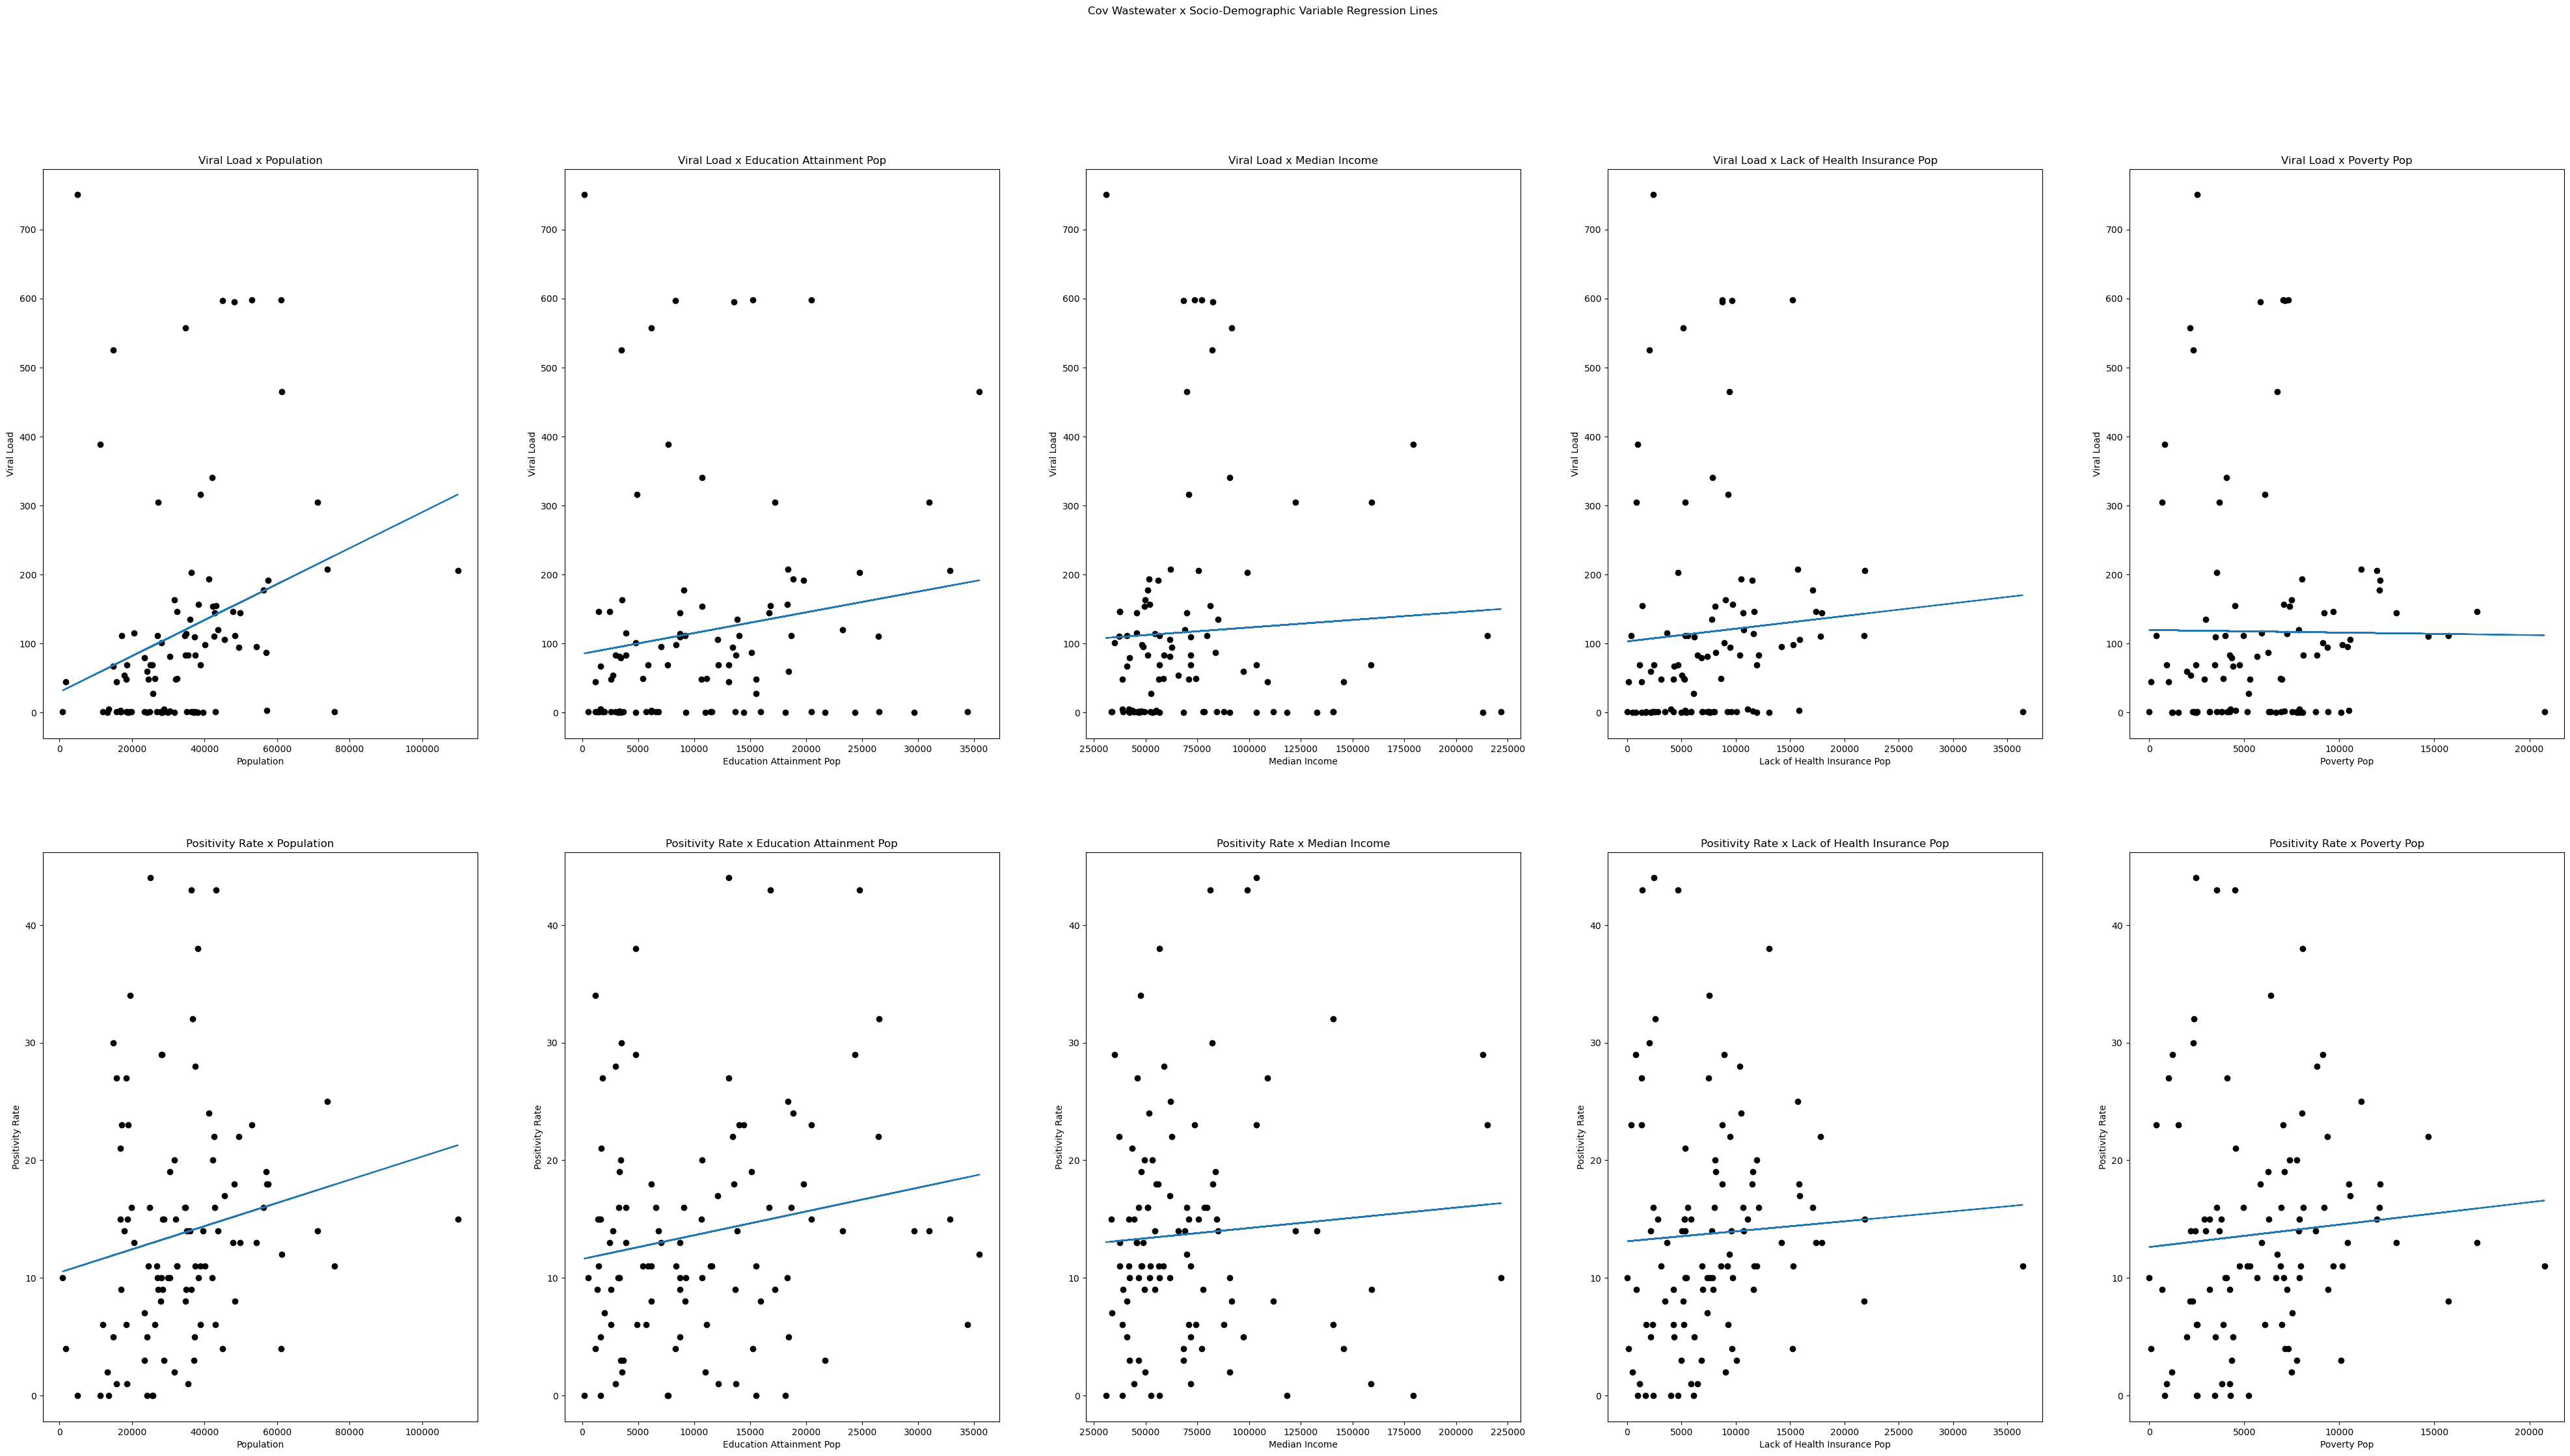

In [50]:
import matplotlib.pyplot as plt


TARGETS = [viral_load, positivity]
EXPLANATORY = [pop, edu, med, health, pov]
XPLAN_NAMES = ["Population", "Education Attainment Pop", "Median Income", "Lack of Health Insurance Pop", "Poverty Pop"]
TGET_NAMES = ["Viral Load", "Positivity Rate"]

COEFS = []

fig, ax = plt.subplots(len(TARGETS), len(EXPLANATORY))
fig.suptitle("Cov Wastewater x Socio-Demographic Variable Regression Lines")
fig.set_figwidth(50)
fig.set_figheight(25)

for index_x, target in enumerate(TARGETS):
    for index_y, var in enumerate(EXPLANATORY):
        model = LinearRegression().fit(var, target)
        COEFS.append(model.score(var, target))

        cur_xplan = XPLAN_NAMES[index_y]
        cur_tget = TGET_NAMES[index_x]
        combo = cur_tget + " x " + cur_xplan

        print(combo + " Coef: " + str(COEFS[len(COEFS) - 1]))

        ax[index_x, index_y].scatter(var, target, color="k")
        ax[index_x, index_y].plot(var, model.predict(var))
        ax[index_x, index_y].set_title(combo)
        ax[index_x, index_y].set(xlabel=cur_xplan, ylabel=cur_tget)

print(COEFS)